In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)
pio.templates.default = "none"

import warnings
warnings.filterwarnings('ignore')


PATH = 'Autism-prediction'
train = pd.read_csv(PATH + "/train.csv")
test = pd.read_csv(PATH + "/test.csv")
sample_submission = pd.read_csv(PATH + "/sample_submission.csv")

In [20]:
display(train.shape)
display(test.shape)

(800, 22)

(200, 21)

In [21]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [22]:
display(train.isna().sum().sum())
display(test.isna().sum().sum())

0

0

In [23]:
# fix the spelling issue 
train = train.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")
test = test.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")

# fix the other/Other capitalization
train['country_of_res'][train['country_of_res'] == 'others'] = 'Others'
test['country_of_res'][test['country_of_res'] == 'others'] = 'Others'

train['ethnicity'][train['ethnicity'] == 'others'] = 'Others'
test['ethnicity'][test['ethnicity'] == 'others'] = 'Others'

In [24]:
# drop un-important cols
train.drop(['ID', 'age_desc'], axis=1, inplace=True)
test.drop(['ID', 'age_desc'], axis=1, inplace=True)

cat_cols = [col for col in train.columns if train[col].dtype == 'object']
num_cols = [col for col in train.columns if train[col].dtype == 'int'][0:-1]

ASD_pos = train[train['Class/ASD']==1]
ASD_neg = train[train['Class/ASD']==0]

In [25]:
for col in cat_cols:
    x = train[col].nunique() 
    y = test[col].nunique()
    print("{}: train {} unique, test {} unique".format(col, x, y))

gender: train 2 unique, test 2 unique
ethnicity: train 11 unique, test 11 unique
jaundice: train 2 unique, test 2 unique
autism: train 2 unique, test 2 unique
country_of_res: train 61 unique, test 44 unique
used_app_before: train 2 unique, test 2 unique
relation: train 6 unique, test 6 unique


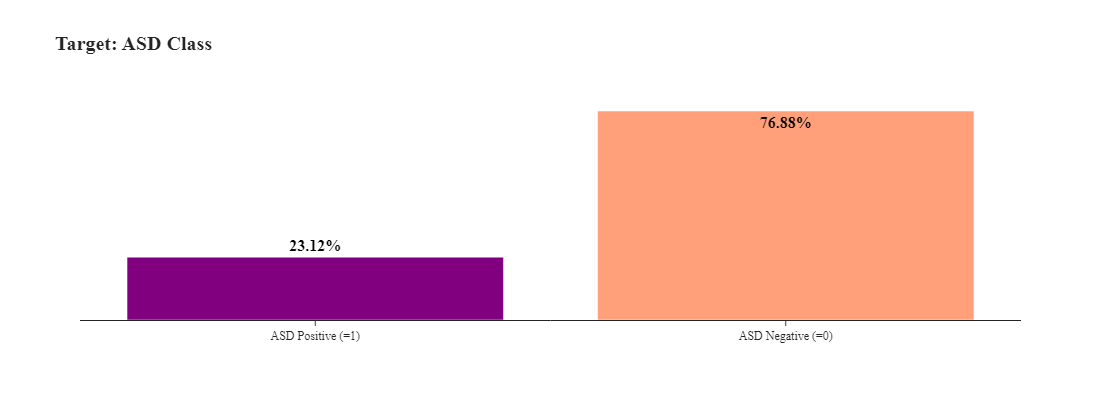

In [26]:
label = ['ASD Positive (=1)', 'ASD Negative (=0)']
value = [ASD_pos.shape[0], ASD_neg.shape[0]] 
pct = [value[0]*100/len(train), value[1]*100/len(train)]


fig = go.Figure(data=[go.Bar(
            y=value, x=label,
            text=(np.round(pct,2)),
            textposition=['outside', 'inside'],
            texttemplate = ["<b style='color: #f'>%{text}%</b>"]*2,
            textfont=dict(  family="sans serif",
                            size=16,
                            color="black"),
            orientation='v',
            marker_color=['purple', 'lightsalmon'],
            opacity=1.0,
                    )])
fig.update_layout(title='<b>Target: ASD Class <b>', 
                  font_family="San Serif",
                  template= 'simple_white',
                  yaxis_linewidth=2.5,
                  width=600, 
                  height=400,
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 20},
                  )
fig.update_xaxes(showgrid=False, showline=True)
fig.update_yaxes(showgrid=False, showline=False, showticklabels=False, ticks='')
fig.show()

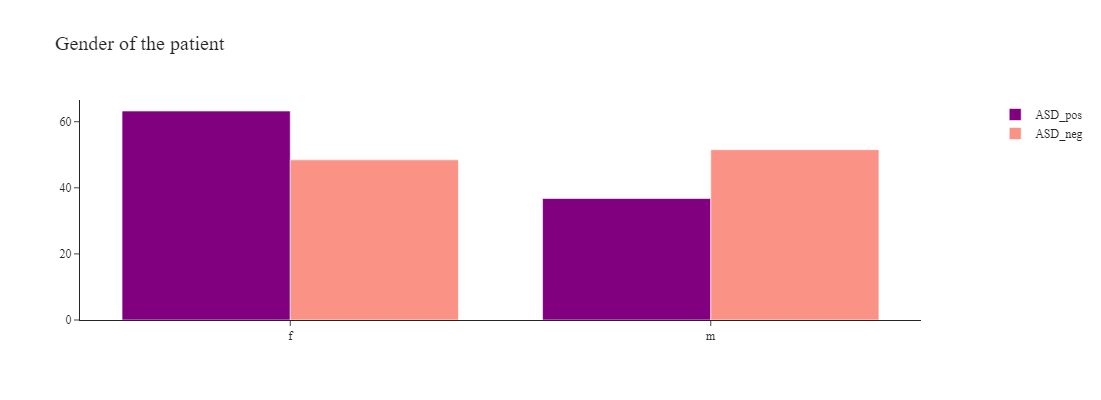

In [27]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['gender'],histnorm='percent',
              name='ASD_pos', marker_color = 'purple'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['gender'],histnorm='percent',
              name='ASD_neg', marker_color = 'salmon', opacity=0.85),
             )  

fig.update_layout(title="Gender of the patient", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.20, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending')
fig.show()

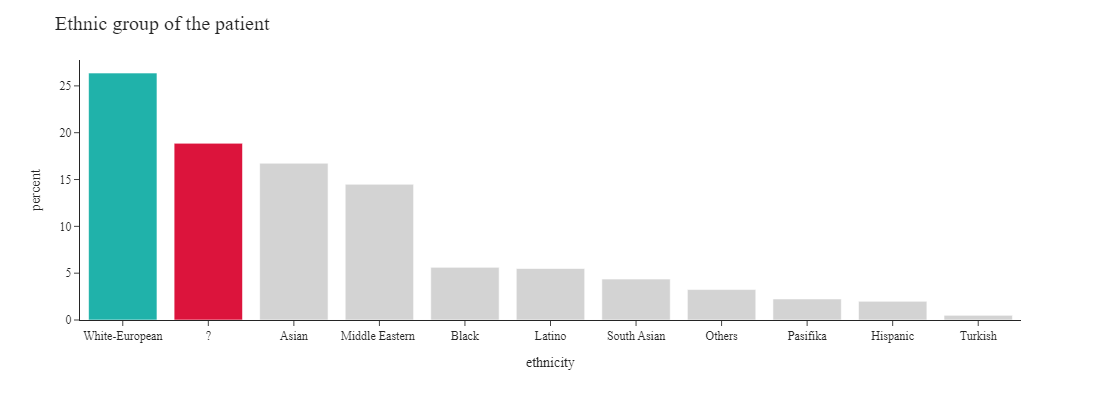

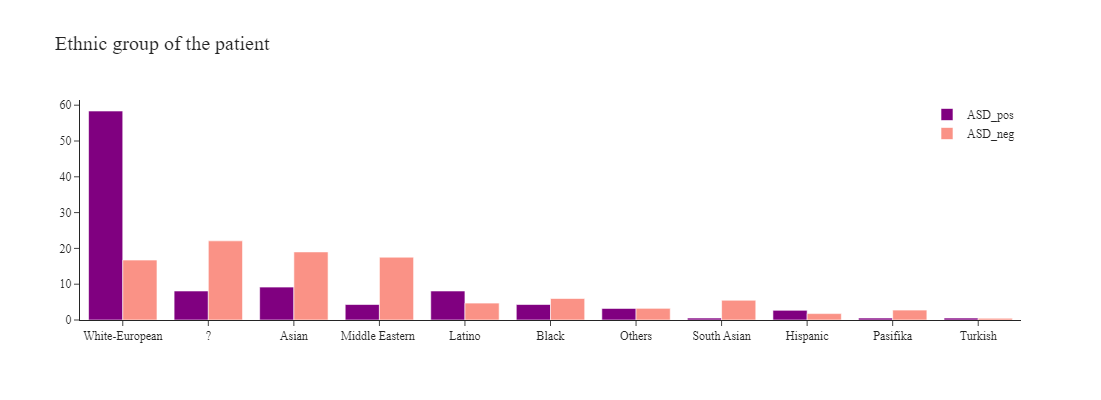

In [28]:
fig = px.histogram(train, x="ethnicity",
                   width=600, 
                   height=400,
                   histnorm='percent',
                   template="simple_white"
                   )

fig.update_layout(title="Ethnic group of the patient", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') # ordering the x-axis values
#custom color
colors = ['lightgray',] * 15  
colors[1] = 'crimson' 
colors[0] = 'lightseagreen' 


fig.update_traces(marker_color=colors, 
                )
fig.show()

fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['ethnicity'],histnorm='percent',
              name='ASD_pos', marker_color = 'purple'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['ethnicity'],histnorm='percent',
              name='ASD_neg', marker_color = 'salmon', opacity=0.85),
             )  

fig.update_layout(title="Ethnic group of the patient", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show()

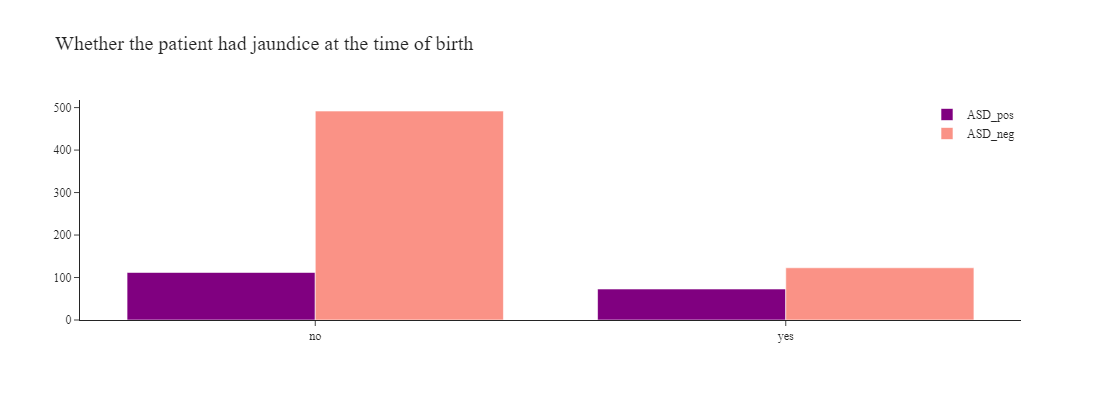

In [29]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['jaundice'],histnorm='',
              name='ASD_pos', marker_color = 'purple'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['jaundice'],histnorm='',
              name='ASD_neg', marker_color = 'salmon', opacity=0.85),
             )  

fig.update_layout(title="Whether the patient had jaundice at the time of birth", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show()

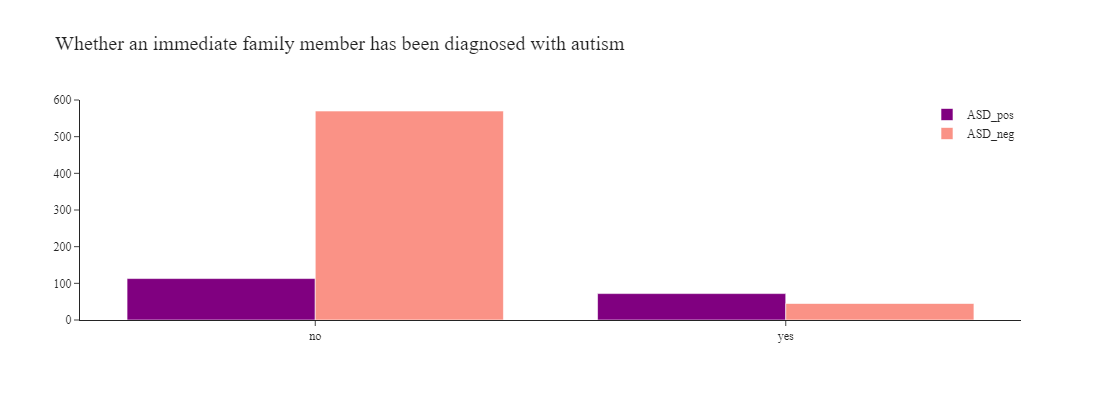

In [30]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['autism'],histnorm='',
              name='ASD_pos', marker_color = 'purple'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['autism'],histnorm='',
              name='ASD_neg', marker_color = 'salmon', opacity=0.85),
             )  

fig.update_layout(title="Whether an immediate family member has been diagnosed with autism", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show()

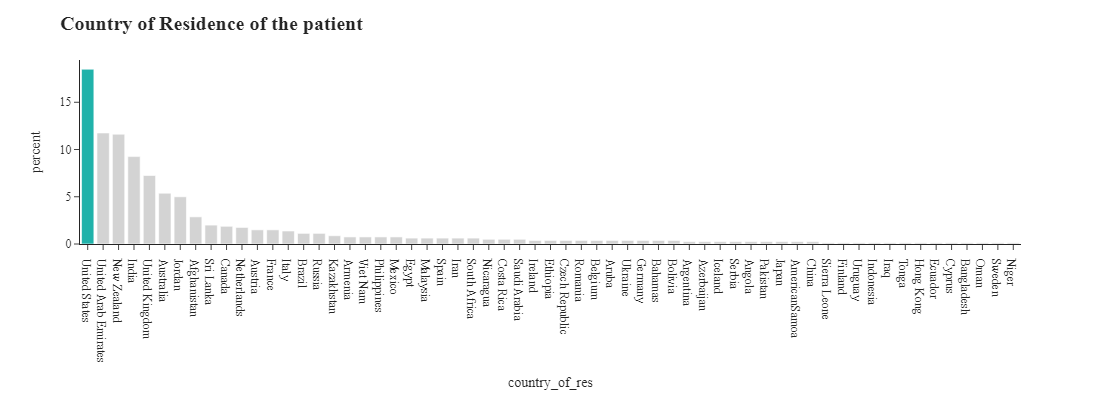

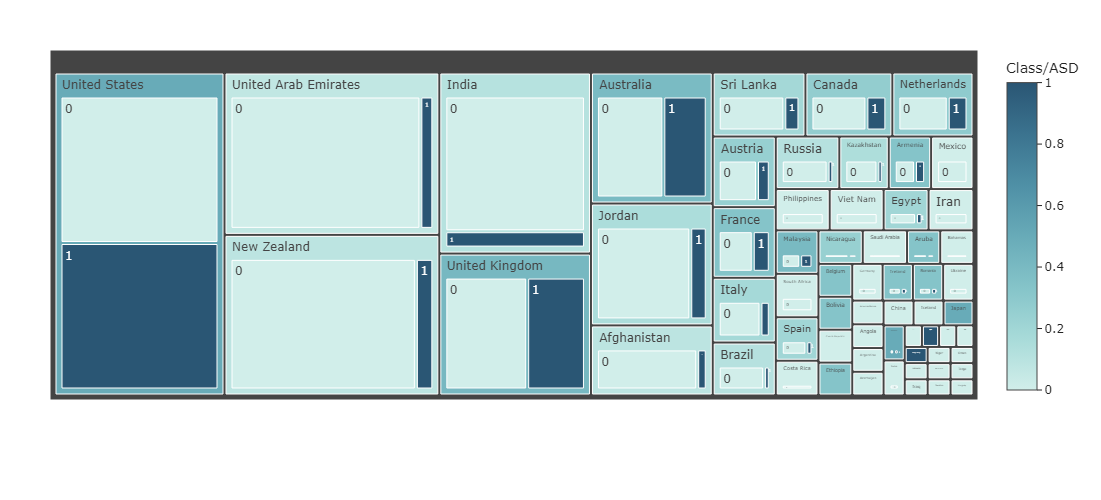

In [31]:
fig = px.histogram(train, x="country_of_res", 
                   width=900, 
                   height=400,
                   histnorm='percent',
                   template="simple_white")
fig.update_layout(title="<b> Country of Residence of the patient <b>", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

colors = ['lightgray',] * 100 
colors[0] = 'lightseagreen' 

fig.update_traces(marker_color=colors, 
                 ).update_xaxes(categoryorder='total descending')
                   
fig.show()

fig = px.treemap(train, path=['country_of_res','Class/ASD'], color='Class/ASD',
                 color_continuous_scale='teal',               
)

fig.update_layout(#title="<b> Country of Residence of the patient<b>",
                  titlefont={'size': 20, 'family': "San Serif"},
                  height=500, width=1000,
                  template='simple_white',
                  autosize=False,
                  margin=dict(l=50,r=50,b=50, t=250,
                             ),
                 )
fig.update_layout(margin = dict(t=50, l=50, r=50, b=100))
fig.show()

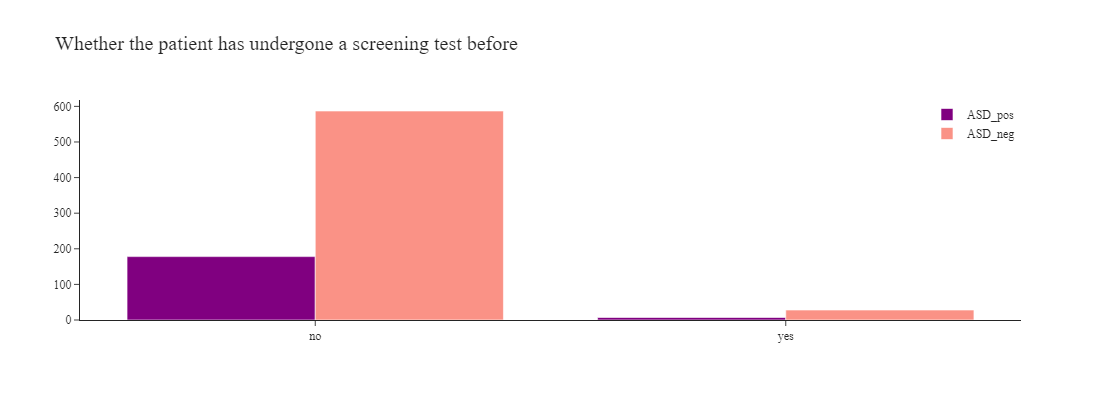

In [32]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=ASD_pos['used_app_before'],histnorm='',
              name='ASD_pos', marker_color = 'purple'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['used_app_before'],histnorm='',
              name='ASD_neg', marker_color = 'salmon', opacity=0.85),
             )    
fig.update_layout(barmode='group')
fig.update_layout(title="Whether the patient has undergone a screening test before", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show()

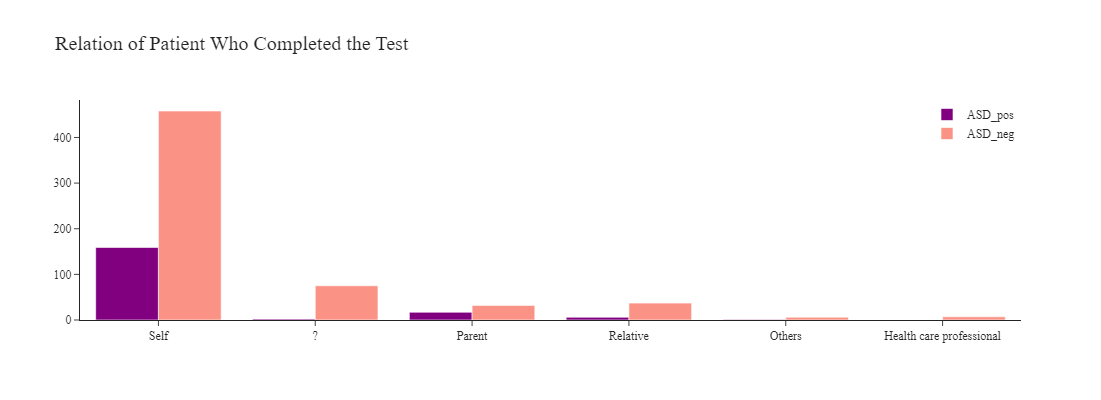

In [41]:
# Most patients have done the tests themselves. Surprisingly, healthcare professionals come last.

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=ASD_pos['relation'], 
    histnorm='', 
    name='ASD_pos', 
    marker_color='purple'
))

fig.add_trace(go.Histogram(
    x=ASD_neg['relation'], 
    histnorm='', 
    name='ASD_neg', 
    marker_color='salmon', 
    opacity=0.85
))

fig.update_layout(
    barmode='group',
    title="Relation of Patient Who Completed the Test", 
    font_family="San Serif",
    titlefont={'size': 20},
    template='simple_white',
    width=600, 
    height=400,
    legend=dict(
        orientation="v", 
        y=1, 
        yanchor="top", 
        x=1.0, 
        xanchor="right"
    )
).update_xaxes(categoryorder='total descending')

fig.show()


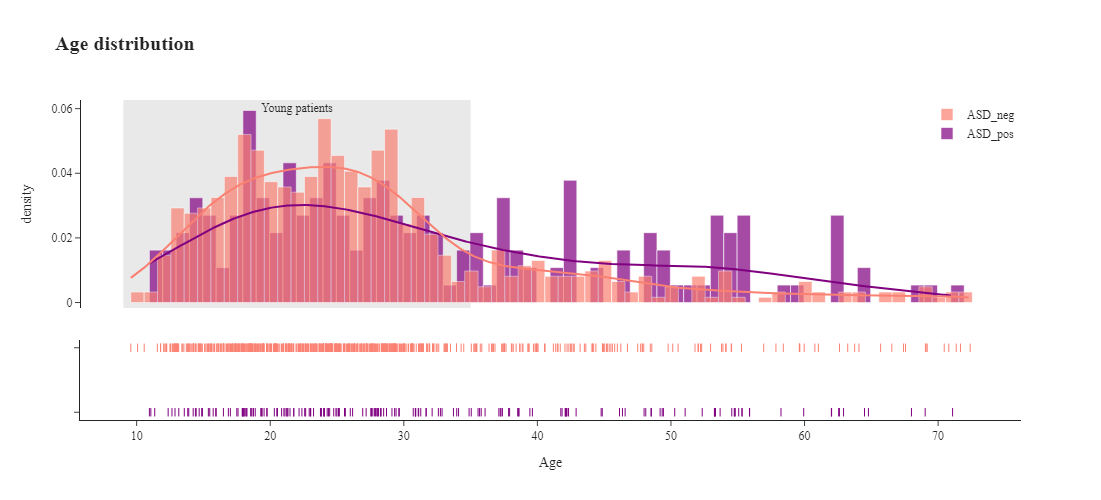

In [42]:
group_labels = ['ASD_pos', 'ASD_neg']
fig = ff.create_distplot([ASD_pos['age'], ASD_neg['age']],
                         group_labels, 
                         show_hist=True, 
                         show_rug=True,
                         colors=['purple', 'salmon'],
                         )
fig.update_layout(title='<b>Age distribution<b>',
                  xaxis_title='Age',
                  yaxis_title='density',
                  titlefont={'size': 20},
                  font_family = 'San Serif',
                  width=700,height=500,
                  template="simple_white",
                  showlegend=True,
                  legend=dict(
                      orientation="v",
                      y=1, 
                      yanchor="top", 
                      x=1.0, 
                      xanchor="right",
                  )
                 )
fig.add_vrect(
    x0=9, x1=35,
    annotation_text="Young patients", annotation_position="top",
    fillcolor="lightgray", opacity=0.5,
    layer="below", line_width=0,
),
fig.show()

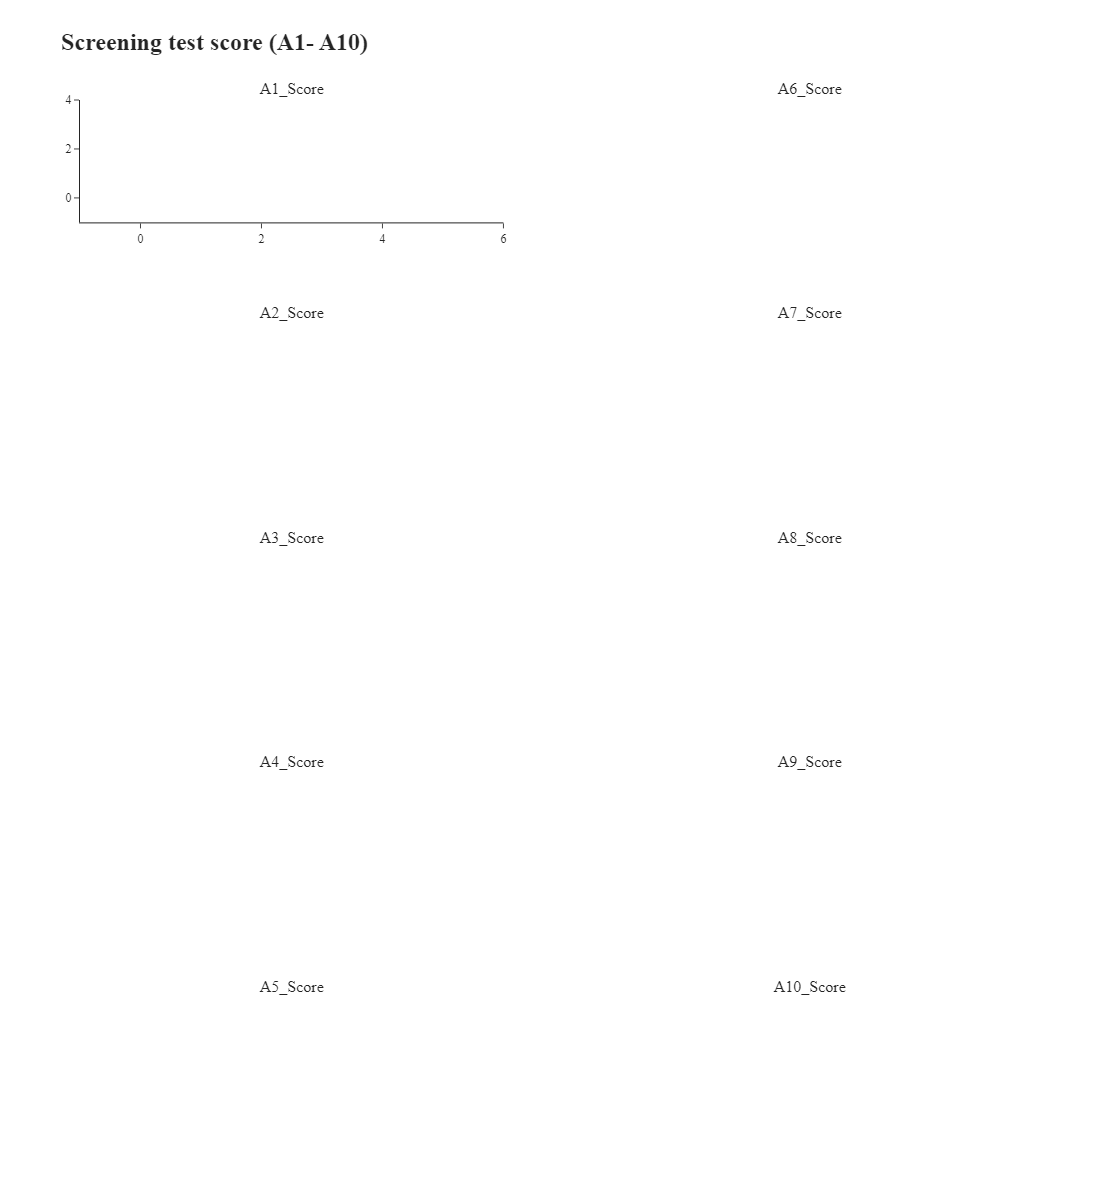

In [43]:
fig = make_subplots(rows=5, cols=2,
                   subplot_titles=('A1_Score','A6_Score', 'A2_Score', 'A7_Score','A3_Score', 
                                   'A8_Score','A4_Score','A9_Score', 'A5_Score','A10_Score',
                                   ))     

for i, feat in enumerate(num_cols[0:5]):
    fig.add_trace(go.Histogram(x=ASD_pos[feat],histnorm='percent',
                  name='ASD_pos', marker_color = 'purple'),
                  row=i+1, col=1)
    fig.add_trace(go.Histogram(x=ASD_neg[feat],histnorm='percent',
                  name='ASD_neg', marker_color = 'salmon', opacity=0.85),

                 row=i+1, col=1)    
    fig.update_layout(barmode='overlay')
                           
for j, feat in enumerate(num_cols[5:12]):
    fig.add_trace(go.Histogram(x=ASD_pos[feat],histnorm='percent',
                  name='ASD_pos', marker_color = 'purple'),
                 row=j+1, col=2)
    fig.add_trace(go.Histogram(x=ASD_neg[feat],histnorm='percent',
                  name='ASD_neg', marker_color = 'salmon', opacity=0.85),
                 row=j+1, col=2)    
    fig.update_layout(barmode='overlay')

fig.update_layout(title=" <b> Screening test score (A1- A10) <b>",
                      font_family="San Serif",
                      titlefont={'size': 24},
                      width=900, height=1200,
                      template='simple_white',
                      showlegend=False,
                      bargap=0.1, 
                      bargroupgap=0.1
                     )

fig.update_layout(barmode='group')
fig.show()

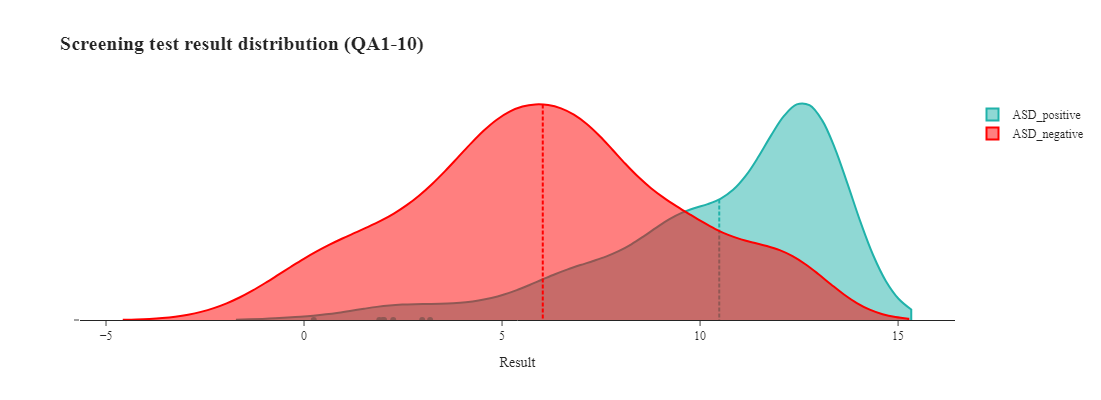

In [44]:
ASD_pos_result = train[train['Class/ASD'] == 1]['result']
ASD_neg_result = train[train['Class/ASD'] == 0]['result']

fig = go.Figure()
fig.add_trace(go.Violin(x=ASD_pos_result, line_color='lightseagreen', name='ASD_positive', y0=0))
fig.add_trace(go.Violin(x=ASD_neg_result, line_color='red', name= 'ASD_negative', y0=0))

fig.update_traces(orientation='h', side='positive', meanline_visible=True)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)

fig.update_layout(title='<b> Screening test result distribution (QA1-10) <b>',
                  font_family="San Serif",
                  xaxis_title='Result',
                  titlefont={'size': 20},
                  width=600,
                  height=400,
                  template="simple_white",
                  showlegend=True,
                  )
fig.update_yaxes(showgrid=False, showline=False, showticklabels=False)
fig.show()

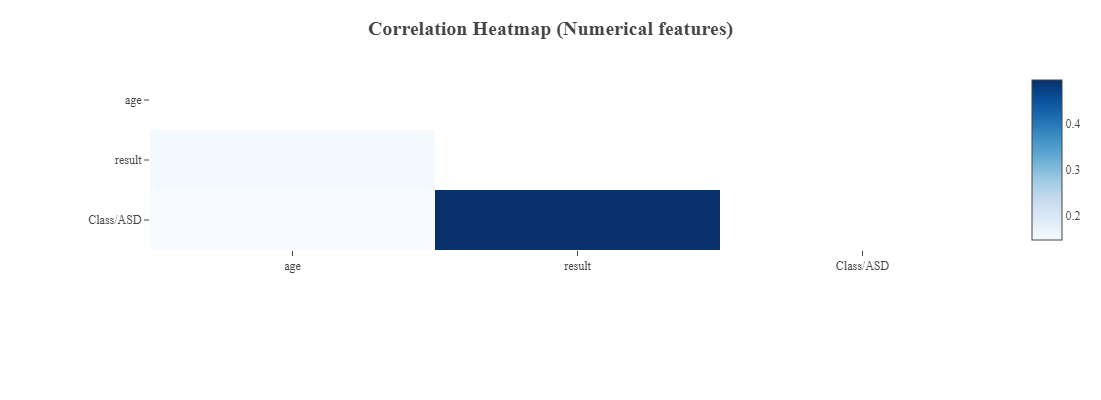

In [46]:
import numpy as np
import plotly.graph_objects as go

x = ['age', 'result', 'Class/ASD']
df = train[x]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Use 'dtype=bool' instead of 'dtype=np.bool'
corr = corr.mask(mask)

fig = go.Figure(data=go.Heatmap(
    z=corr,
    x=corr.index.values,
    y=corr.columns.values,
    colorscale='Blues'
))

fig.update_layout(
    title_text='<b>Correlation Heatmap (Numerical features)<b>',
    font_family="San Serif",
    title_x=0.5,
    titlefont={'size': 20},
    width=450, height=400,
    xaxis_showgrid=False,
    xaxis={'side': 'bottom'},
    yaxis_showgrid=False,
    yaxis_autorange='reversed',
    autosize=False,
    margin=dict(l=150, r=50, b=150, t=70, pad=0)
)

fig.show()


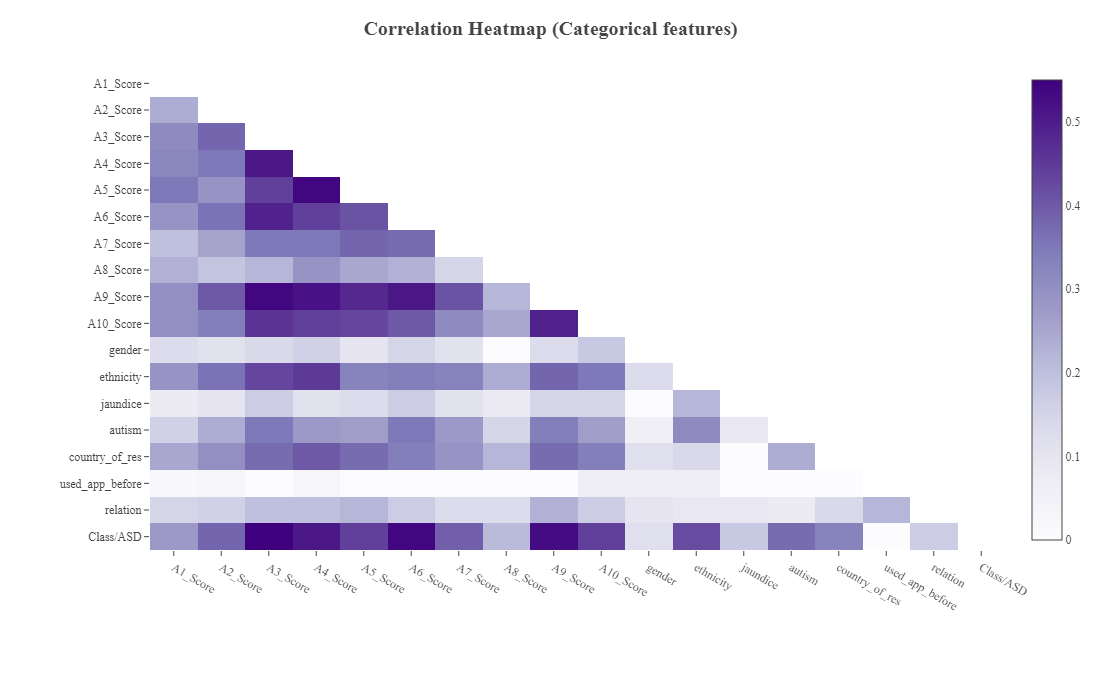

In [48]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy import stats

def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

def plot_cramersV_corr(df):
    rows = []
    for x in df:
        col = []
        for y in df:
            cramers = cramers_v(df[x], df[y])
            col.append(round(cramers, 2))
        rows.append(col)

    cramers_results = np.array(rows)
    df_corr = pd.DataFrame(cramers_results, columns=df.columns, index=df.columns)

    mask = np.triu(np.ones_like(df_corr, dtype=bool))  # Updated dtype to `bool`
    df_corr = df_corr.mask(mask)

    fig = go.Figure(data=go.Heatmap(
        z=df_corr,
        x=df_corr.index.values,
        y=df_corr.columns.values,
        colorscale='purples'
    ))

    fig.update_layout(
        title_text='<b>Correlation Heatmap (Categorical features)<b>',
        font_family="San Serif",
        title_x=0.5,
        titlefont={'size': 20},
        width=750, height=700,
        xaxis_showgrid=False,
        xaxis={'side': 'bottom'},
        yaxis_showgrid=False,
        yaxis_autorange='reversed',
        autosize=False,
        margin=dict(l=150, r=50, b=150, t=70, pad=0)
    )
    
    fig.show()

# Assuming 'train' is a DataFrame containing your data
plot_cramersV_corr(train.drop(['age', 'result'], axis=1))


In [51]:
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [52]:
label_encoder = LabelEncoder()
train_le = train.copy()
test_le = test.copy()

for col in cat_cols:
        train_le[col] = label_encoder.fit_transform(train[col])
        test_le[col] = label_encoder.fit_transform(test[col]) 
        
train = train_le
test = test_le


In [53]:
FEATURES = train.columns[0:-1]
TARGET = train.columns[-1]

X = train.loc[:, FEATURES]
y = train.loc[:, TARGET]

seed = 0
fold = 5

In [54]:
def score(X, y, model, cv):
    scoring = ["roc_auc"]
    scores = cross_validate(
        model, X, y, scoring=scoring, cv=cv, return_train_score=True,
    )
    scores = pd.DataFrame(scores).T
    return scores.assign(
        mean = lambda x: x.mean(axis=1),
        std = lambda x: x.std(axis=1),
    )

skf = StratifiedKFold(n_splits=fold, shuffle=True, random_state=seed)

In [55]:
model_lr = LogisticRegression(solver='saga', 
                              tol=1e-5, max_iter=10000,
                              random_state=0,
                              C=0.22685190926977272,
                              penalty='l2',
                             )

scores = score(X, y, model_lr, cv=skf)
display(scores)

,0,1,2,3,4,mean,std
fit_time,0.900397,0.930362,0.796831,0.854089,0.907840,0.877904,0.047527
score_time,0.010354,0.002078,0.002068,0.001554,0.001999,0.003611,0.003377
test_roc_auc,0.919798,0.863107,0.900022,0.954296,0.939134,0.915271,0.031832
train_roc_auc,0.924165,0.935825,0.928120,0.915403,0.916392,0.923981,0.007597


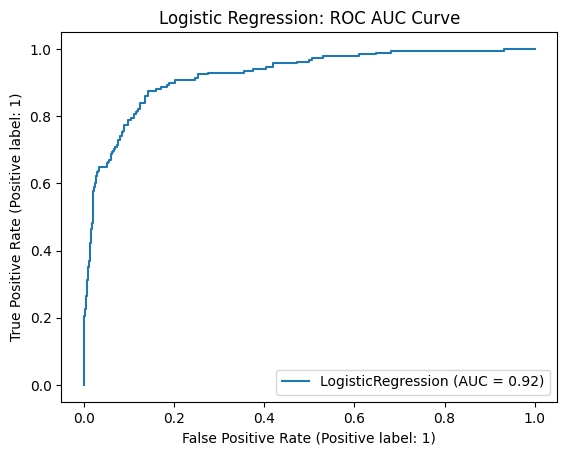

In [57]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

model_lr.fit(X, y)

# Replace plot_roc_curve with RocCurveDisplay
RocCurveDisplay.from_estimator(model_lr, X, y)
plt.title('Logistic Regression: ROC AUC Curve')
plt.show()


In [58]:
y_pred_lr = pd.Series(
    model_lr.predict_proba(test)[:, 1],
    index=test.index,
    name=TARGET,
)
sub = pd.DataFrame({'ID': sample_submission.ID, 'Class/ASD': y_pred_lr})
sub.to_csv("submission_lr.csv", index=False)

In [59]:
model_etc = ExtraTreesClassifier(
    n_estimators=1000,
    max_depth=2,
    random_state=0,
)
scores = score(X, y, model_etc, cv=skf)
display(scores)

,0,1,2,3,4,mean,std
fit_time,0.625017,0.518519,0.636111,0.610004,0.557689,0.589468,0.044508
score_time,0.061396,0.036199,0.048540,0.036120,0.036517,0.043755,0.010019
test_roc_auc,0.907273,0.875192,0.892112,0.946825,0.959350,0.916150,0.032067
train_roc_auc,0.923094,0.932831,0.926211,0.912959,0.911482,0.921315,0.008078


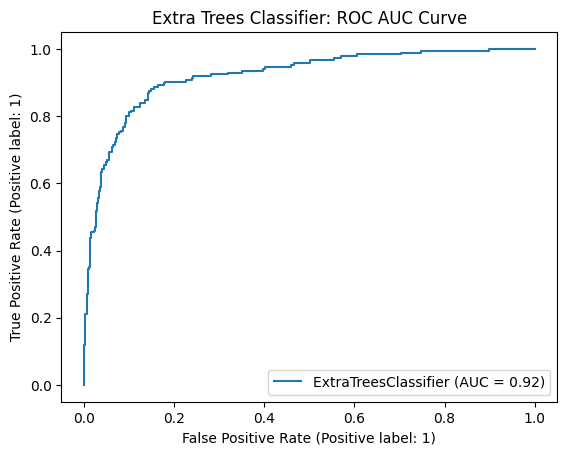

In [73]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

model_etc.fit(X, y)

# Replace plot_roc_curve with RocCurveDisplay
RocCurveDisplay.from_estimator(model_etc, X, y)
plt.title('Extra Trees Classifier: ROC AUC Curve')
plt.show()


In [74]:
y_pred_etc = pd.Series(
    model_etc.predict_proba(test)[:, 1],
    index=test.index,
    name=TARGET,
)
sub = pd.DataFrame({'ID': sample_submission.ID, 'Class/ASD': y_pred_etc})
sub.to_csv("submission_etc.csv", index=False)

In [75]:
model_etc = ExtraTreesClassifier(
    n_estimators=1000,
    max_depth=2,
    random_state=0,
)
scores = score(X, y, model_etc, cv=skf)
display(scores)

,0,1,2,3,4,mean,std
fit_time,0.634192,0.605062,0.604461,0.589588,0.597965,0.606254,0.015044
score_time,0.040650,0.044322,0.037440,0.042240,0.041350,0.041201,0.002249
test_roc_auc,0.907273,0.875192,0.892112,0.946825,0.959350,0.916150,0.032067
train_roc_auc,0.923094,0.932831,0.926211,0.912959,0.911482,0.921315,0.008078


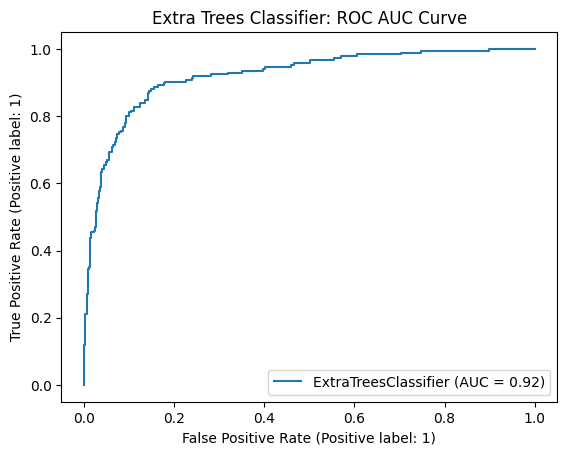

In [77]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Fit the model
model_etc.fit(X, y)

# Plot the ROC AUC curve using RocCurveDisplay
RocCurveDisplay.from_estimator(model_etc, X, y)
plt.title('Extra Trees Classifier: ROC AUC Curve')
plt.show()


In [79]:
y_pred_etc = pd.Series(
    model_etc.predict_proba(test)[:, 1],
    index=test.index,
    name=TARGET,
)
sub = pd.DataFrame({'ID': sample_submission.ID, 'Class/ASD': y_pred_etc})
sub.to_csv("submission_etc.csv", index=False)

In [80]:
sub1 = pd.DataFrame({'ID': sample_submission.ID, 'Class/ASD':(0.35* y_pred_etc + 0.65* y_pred_lr)})
sub1.to_csv("submission_etc35_lr65.csv", index=False)

sub2 = pd.DataFrame({'ID': sample_submission.ID, 'Class/ASD': (0.5* y_pred_etc + 0.5* y_pred_lr)})
sub2.to_csv("submission_etc5_lr5.csv", index=False)

sub3 = pd.DataFrame({'ID': sample_submission.ID, 'Class/ASD': (0.4* y_pred_etc + 0.6* y_pred_lr)})
sub3.to_csv("submission_etc4_lr6.csv", index=False)

In [84]:
import pickle

# Save the DataFrame with predictions from the Extra Trees model
with open("submission_etc.pkl", "wb") as f:
    pickle.dump(sub, f)

# Save the weighted average predictions with 35% Extra Trees and 65% Logistic Regression
with open("submission_etc35_lr65.pkl", "wb") as f:
    pickle.dump(sub1, f)

# Save the weighted average predictions with 50% Extra Trees and 50% Logistic Regression
with open("submission_etc5_lr5.pkl", "wb") as f:
    pickle.dump(sub2, f)

# Save the weighted average predictions with 40% Extra Trees and 60% Logistic Regression
with open("submission_etc4_lr6.pkl", "wb") as f:
    pickle.dump(sub3, f)
